In [545]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#for presenting maximum columns
pd.set_option('display.max_columns',None)

In [546]:
#loading dataset
df=pd.read_csv('Data_Train.csv')
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [547]:
#cheking shape of the dataset
df.shape

(10683, 11)

The dataset contains 10683 rows and 11 columns.

In [548]:
#chechking type of the each columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Observation: 

           we can see we have all object columns except output column which needs to be first converted into numeric after removing Null values

In [549]:
#checking unique values
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

# Univariate Analysis:-

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


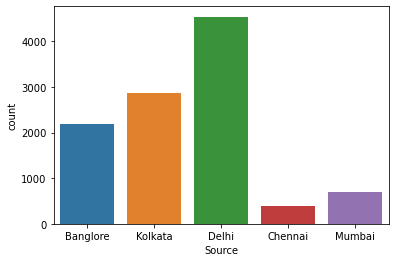

In [550]:
import seaborn as sns
ax=sns.countplot(x="Source",data=df)
print(df["Source"].value_counts())

the source column is having Delhi 4537,Kolkata  2871,Banglore 2197,Mumbai 697,Chennai 381 data

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


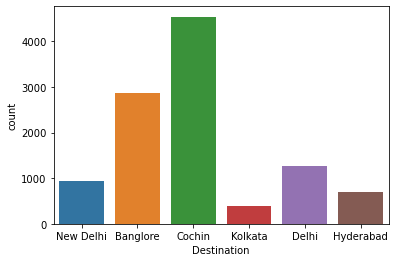

In [551]:
import seaborn as sns
ax=sns.countplot(x="Destination",data=df)
print(df["Destination"].value_counts())

the destination column is having Cochin 4537,Banglore  2871,Delhi 1265,New Delhi 932,Hyderabad 697,Kolkata 381 data

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


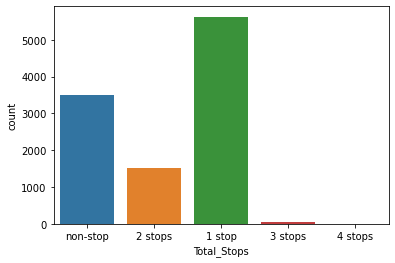

In [552]:
import seaborn as sns
ax=sns.countplot(x="Total_Stops",data=df)
print(df["Total_Stops"].value_counts())

The Total_stops column is having 1 stop 5625,non-stop 3491,2 stops 1520 ,3 stops 45,but only 4 stop is 1 data point

# checking null values with graph

In [553]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observations :
    
    Route columns is having only 1 missing value 
    
    Total_stops columns is having one missing value

<AxesSubplot:>

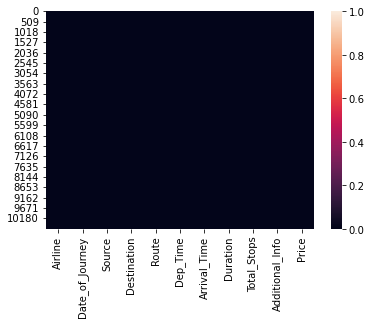

In [554]:
sns.heatmap(df.isnull())

Updating Null Values with fillna

In [555]:
#filling null values wit fillna method
df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [556]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null values are filled by fillna method

# Data conversion using Label Encoder 

In [557]:
from sklearn.preprocessing import LabelEncoder

In [558]:
#by using for loop here we encoded the object columns
le =LabelEncoder()

list1=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [559]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
5,8,27,3,0,64,66,830,235,4,8,3873
6,4,8,0,5,5,172,742,65,0,5,11087
7,4,0,0,5,5,55,463,145,0,8,22270
8,4,8,0,5,5,65,742,185,0,5,11087
9,6,30,2,1,104,91,1124,341,0,8,8625


Here we have converted object columns in Numeric 

In [560]:
#checking class of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Date_of_Journey  10683 non-null  int32
 2   Source           10683 non-null  int32
 3   Destination      10683 non-null  int32
 4   Route            10683 non-null  int32
 5   Dep_Time         10683 non-null  int32
 6   Arrival_Time     10683 non-null  int32
 7   Duration         10683 non-null  int32
 8   Total_Stops      10683 non-null  int32
 9   Additional_Info  10683 non-null  int32
 10  Price            10683 non-null  int64
dtypes: int32(10), int64(1)
memory usage: 500.9 KB


# Describe the Data 

In [561]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


Observation:

we can see the Data is deviated by looking at std dev which is getting more than +-1.

we can see in almost all the columns min value is zero.

Comparison in Mean and 50%: Some of the column is having Mean value greater than 50% hence we can say that we have skewness prsent in Data which can be find by skew method and can be removed by Power transform or Boxcox method.

Comparison in 75% and Max: Here we can see some columns are having big diff within 75% and Max data hence we can say that outliers can be present which we can see by percentile and can be removed by Z score method.

If we have any irrelavant column by checking corelation so we can remove those columns


# Checking correlation

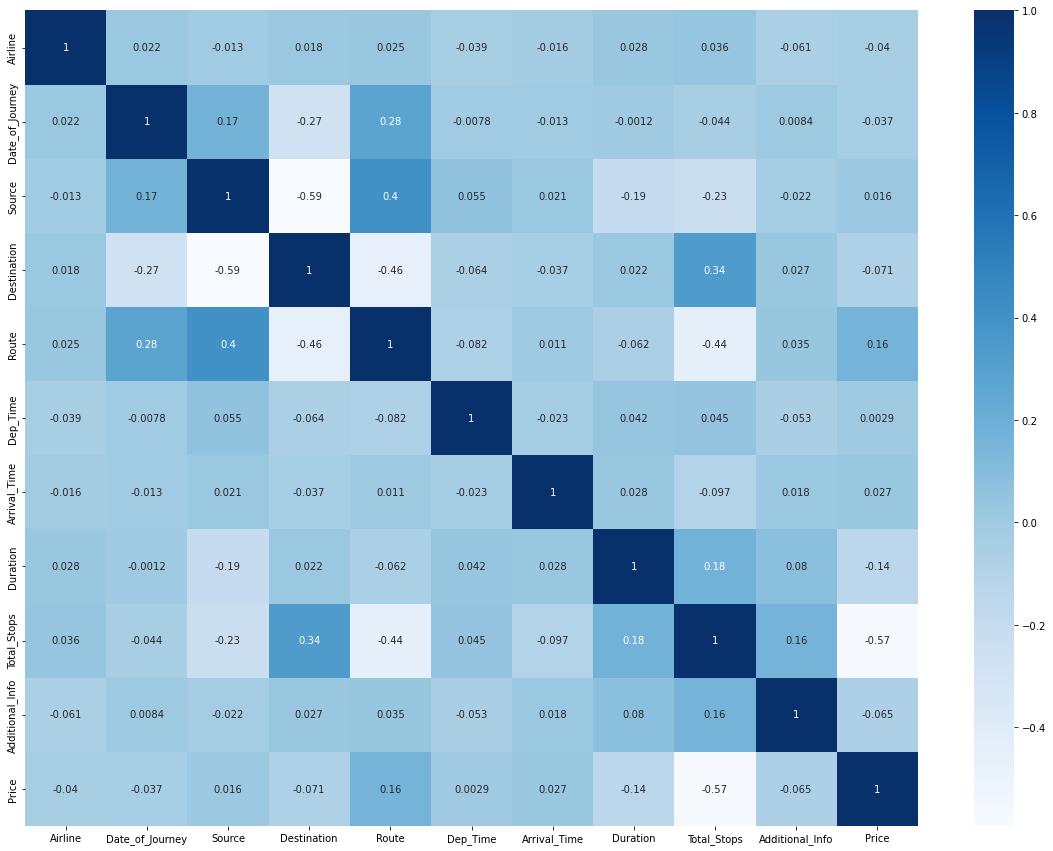

In [562]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.show()

Observations:
    
    Airline columns is positively correlated with label columns 
    
    Date_of_journey, Destination Route Arrival_time ,Total_stops ,Additinal_info column in negatively correlated with the price column
    
    Total_stops is highly  negatively correlated with the label so we drop the this columns 

# Corlelation with Output columns

In [563]:
corr_mat['Price'].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.571174
Name: Price, dtype: float64

we can see the Dep _time is positively corelated with output column where Toatl_stops are negatively corelated.
as it is not close to -1 hence we will drop this columns as our output is incremental and will use Linear regression as well.

# Dropping Unwanted columns :

In [564]:
df.drop(columns=['Total_Stops'],axis=1,inplace=True)

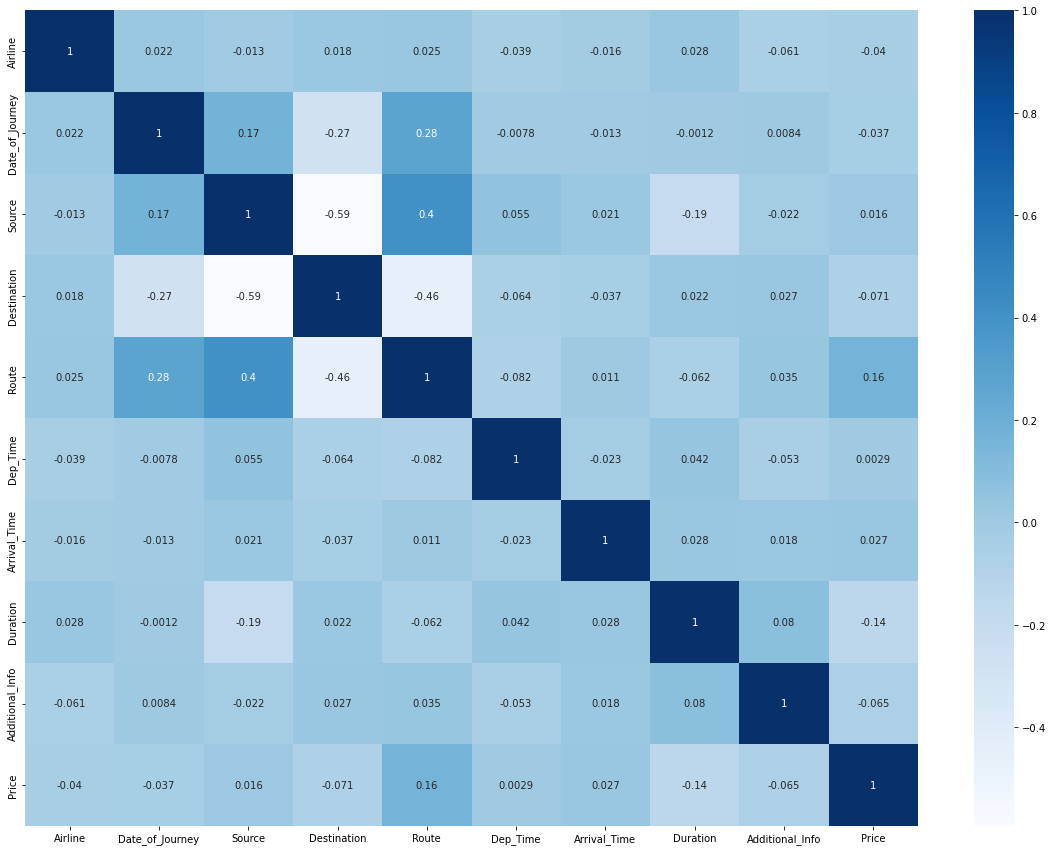

In [565]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.show()

The duration column is near to zero with negative corelation hence we will not drop this column

# checking data distribution by dist plot for Skewness

checking normal distribution for skewness and outliers

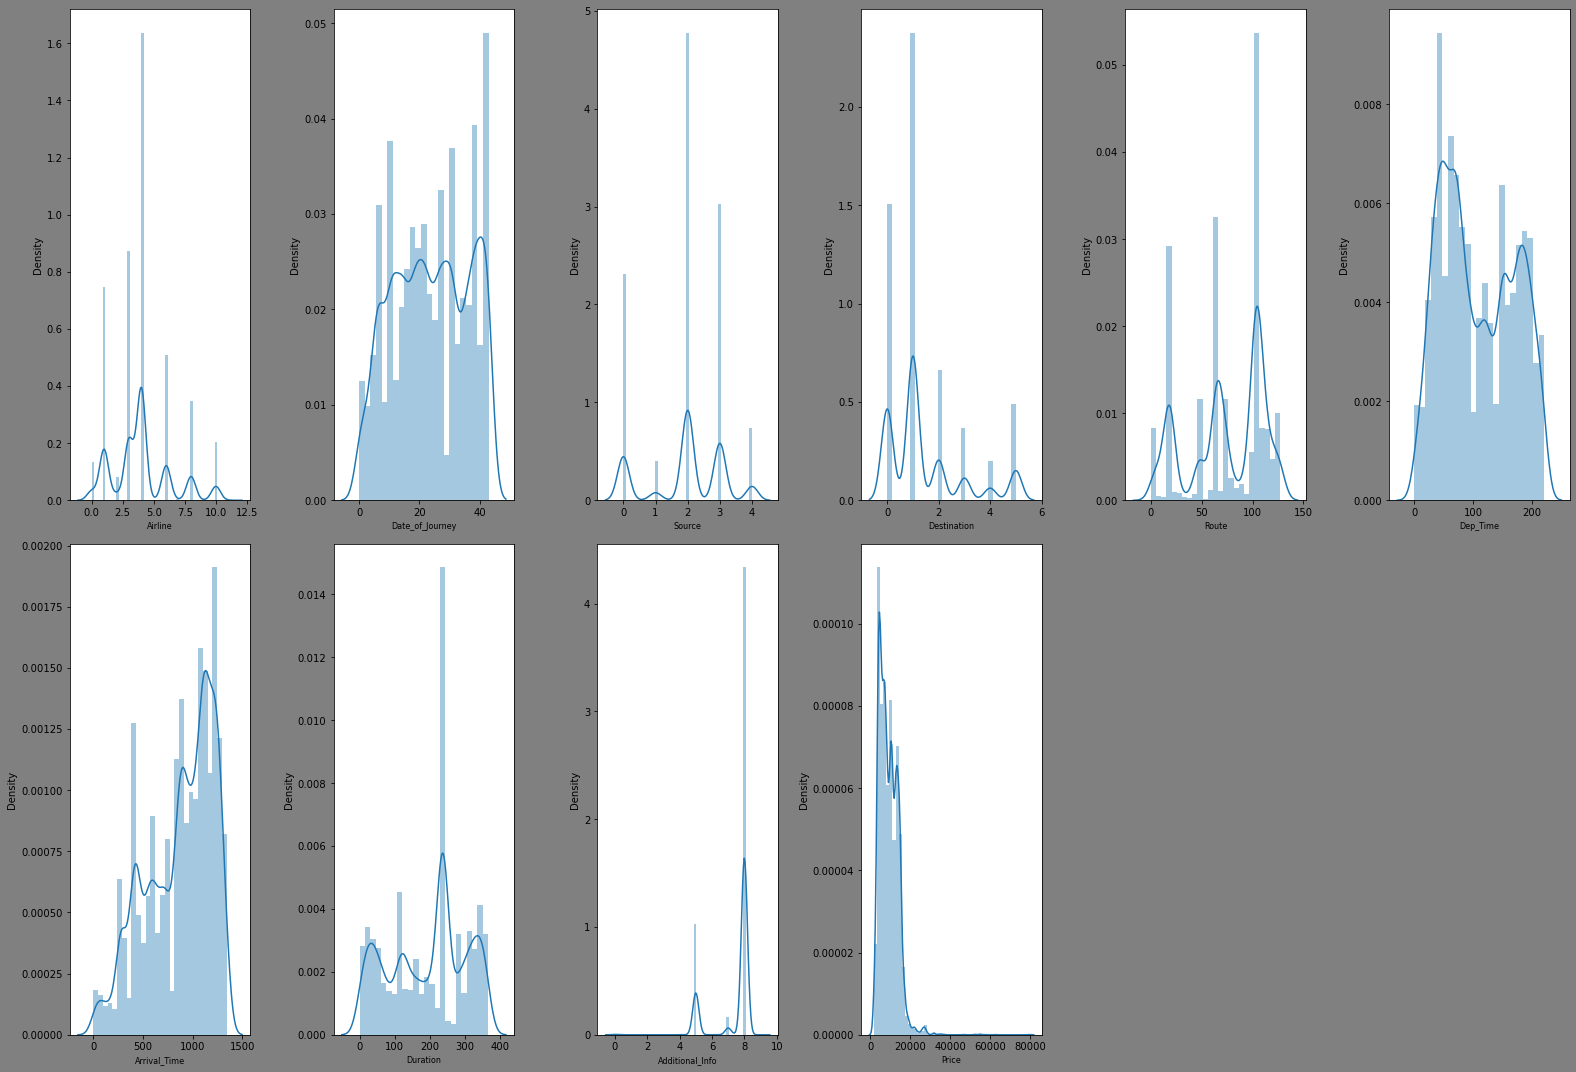

In [566]:
# checking wether te data is normally distributed or not!!!!!!!!!!!!
plt.figure(figsize=(22,15),facecolor='gray')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

observations 

The data is skewed in columns.
           
The distribution is not normally distributedi all columns.so we convert the skewed data into a normal distribution              by Log transformer or power transformer method
           

# Checking and Handling Outliers

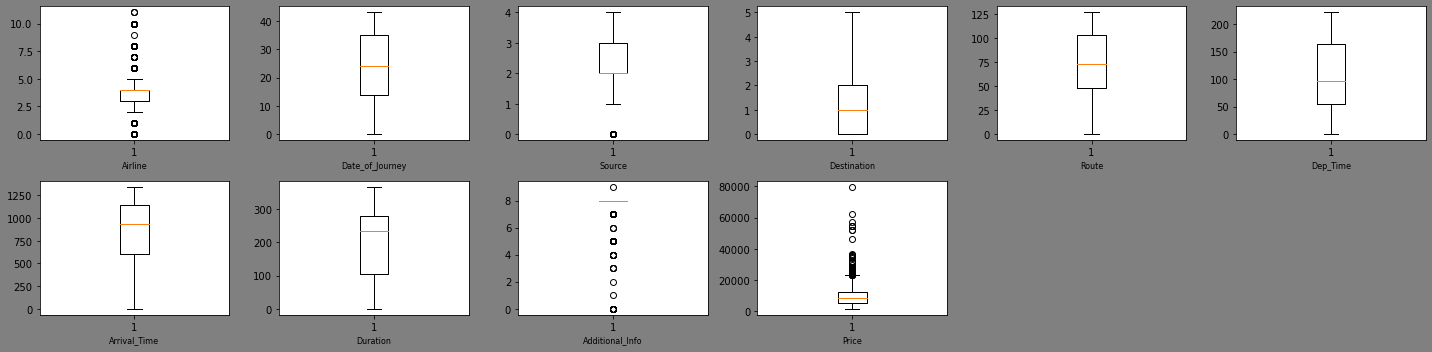

In [567]:
plt.figure(figsize=(20,5),facecolor='gray')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

Observations:
here we can see the airline,source, additional info columns are having outliers hence we will use Z score method to check and remove outliers

In [568]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Price'],
      dtype='object')

# Removing outliers by zscore method

In [569]:
from scipy.stats import zscore

In [570]:
z=np.abs(zscore(df))
z

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,0.410675,0.021472,1.658441,2.416665,1.547183,1.686554,1.921086,0.422875,0.499892,1.125548
1,1.260999,1.437532,0.890052,0.973826,0.249876,1.260270,0.109117,1.306727,0.499892,0.309048
2,0.014486,1.561532,0.040555,0.295728,1.175633,0.621792,1.378090,0.810835,0.499892,1.039858
3,0.410675,1.113308,0.890052,0.973826,0.440473,0.917105,1.370075,1.076557,0.499892,0.622202
4,0.410675,1.923866,1.658441,2.416665,1.247673,0.671537,1.107627,1.002903,0.499892,0.914076
...,...,...,...,...,...,...,...,...,...,...
10678,1.686161,1.399420,0.890052,0.973826,0.294688,1.228159,1.173993,0.386047,0.499892,1.080006
10679,1.260999,0.426751,0.890052,0.973826,0.294688,1.391872,1.312759,0.395254,0.499892,1.071765
10680,0.014486,0.426751,1.658441,0.382370,1.547183,0.818247,0.138248,0.791146,0.499892,0.402951
10681,2.565458,1.923866,1.658441,2.416665,1.547183,0.261624,0.205650,0.404461,0.499892,0.772246


In [571]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9,

In [572]:
df1=df[(z<3).all(axis=1)]
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,24,0,5,18,211,233,240,8,3897
1,1,6,3,0,84,31,906,336,8,7662
2,4,43,2,1,118,70,413,106,8,13882
3,3,10,3,0,91,164,1324,311,8,6218
4,3,0,0,5,29,149,1237,303,8,13302
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,8,4107
10679,1,29,3,0,64,193,1305,237,8,4145
10680,4,29,0,2,18,58,824,280,8,7229
10681,10,0,0,5,18,92,938,238,8,12648


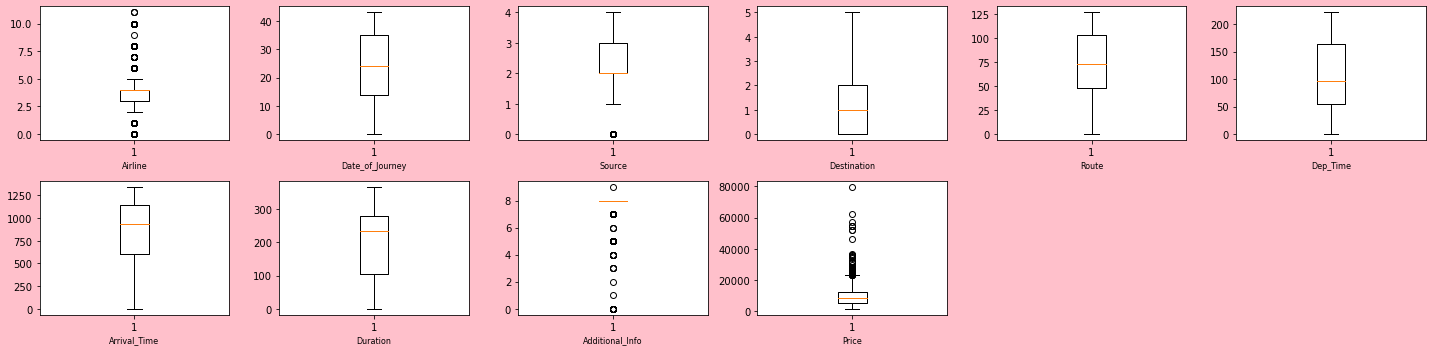

In [573]:

plt.figure(figsize=(20,5),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

Observations: 

we can see outlier is still present but we cant use Z score twice as to avoid Data loss

In [574]:
df1.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,3.968330,23.909435,1.965873,1.408773,75.304216,107.983551,870.172150,194.123464,7.404897,8890.134241
std,2.358492,12.210947,1.169508,1.447988,36.397147,61.045733,331.344284,108.405421,1.171695,4061.577272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,108.000000,8.000000,5228.000000
50%,4.000000,24.000000,2.000000,1.000000,74.000000,96.000000,937.000000,233.000000,8.000000,8353.500000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,8.000000,12293.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,9.000000,22798.000000


Observation: Std dev is high in multiple columns hence possibilies are present for skwness in Data. Need to remove skwness from all columns with using Power transform technique. It also convert the data in same format hence we can further use standard scaler

# checking outliers with percentile technique

In [575]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Price'],
      dtype='object')

In [576]:
df1['Airline'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     1.0
0.2     2.0
0.3     3.0
0.4     3.0
0.5     4.0
0.6     4.0
0.7     4.0
0.8     6.0
0.9     8.0
1.0    11.0
Name: Airline, dtype: float64

here we can see the diff in each quantile is around 1 or 2 but 90th and 100th quantile is having diff of 3 hence some outlier is present.

In [577]:
df1['Date_of_Journey'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     7.0
0.2    11.0
0.3    15.0
0.4    20.0
0.5    24.0
0.6    28.0
0.7    32.0
0.8    37.0
0.9    41.0
1.0    43.0
Name: Date_of_Journey, dtype: float64

here we can see the diff in each quantile is almost same hence not outlier is present

In [578]:
df1['Source'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    0.0
0.1    0.0
0.2    0.4
0.3    2.0
0.4    2.0
0.5    2.0
0.6    2.0
0.7    3.0
0.8    3.0
0.9    3.0
1.0    4.0
Name: Source, dtype: float64

herewe can see small amount of outlier is present on starting quatiles

In [579]:
df1['Additional_Info'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    4.0
0.1    5.0
0.2    7.0
0.3    8.0
0.4    8.0
0.5    8.0
0.6    8.0
0.7    8.0
0.8    8.0
0.9    8.0
1.0    9.0
Name: Additional_Info, dtype: float64

we can see on starting we have diff in 0th,1st and 2nd quatile hence small amount of outliers are present

# Creating feature and labels

In [580]:
X=df1.drop('Price',axis=1)
y=df1.Price

In [581]:
X.shape

(10578, 9)

In [582]:
y.shape

(10578,)

# checking and Handling skewness

In [583]:
X.skew().sort_values(ascending=False)

Destination        1.269454
Airline            0.731709
Dep_Time           0.194141
Date_of_Journey   -0.061918
Duration          -0.216095
Source            -0.439204
Route             -0.511368
Arrival_Time      -0.608273
Additional_Info   -1.533587
dtype: float64

we have some skewness present in Destination, Airline, Route, Arrival_time, Additional_Info as it is not in range of +-0.5

# Using power_tranform method 

In [584]:
from sklearn.preprocessing import power_transform

In [585]:
x_new=power_transform(X)

In [586]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

3    0.040863
0   -0.015590
5   -0.150696
1   -0.214275
2   -0.234422
6   -0.382489
7   -0.391174
4   -0.437329
8   -1.363711
dtype: float64

In [587]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False) # assigning columns from X

Destination        0.040863
Airline           -0.015590
Dep_Time          -0.150696
Date_of_Journey   -0.214275
Source            -0.234422
Arrival_Time      -0.382489
Duration          -0.391174
Route             -0.437329
Additional_Info   -1.363711
dtype: float64

In [588]:
x=pd.DataFrame(x_new,columns=X.columns)

In [589]:
x.skew().sort_values(ascending=False)

Destination        0.040863
Airline           -0.015590
Dep_Time          -0.150696
Date_of_Journey   -0.214275
Source            -0.234422
Arrival_Time      -0.382489
Duration          -0.391174
Route             -0.437329
Additional_Info   -1.363711
dtype: float64

from All column Skwness got removed except Additional_Info .

This "Additional_Info " column we cant handle by Boxcox method as well as it performs on positive Data.

# Using StandardScaler

In [596]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# USing VIF (Variance inflation Factor) to handle Multicolinearity

In [597]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif.sort_values(by='vif',ascending=False)

,vif,feature
2,1.720346,Source
3,1.653160,Destination
4,1.202818,Route
1,1.084300,Date_of_Journey
7,1.061707,Duration
8,1.047857,Additional_Info
0,1.038650,Airline
5,1.034570,Dep_Time
6,1.008096,Arrival_Time


we can see all columns are in range of VIF i.e Not Greter tha 5 hence we will not drop any column

In [598]:
x.shape

(10578, 9)

In [599]:
y.shape

(10578,)

# Model Prediction

# Using Linear Regression algorithm:-

In [601]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.14895855243045053 Random state 0.1
accuracy 0.1638831131000551 Random state 0.11
Best accuracy is 16.38831131000551 on Random state 0.11


In [602]:
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.12510543184037382 Random state 1
accuracy 0.19043048056724998 Random state 2
accuracy 0.1945702158958189 Random state 217
Best accuracy is 19.457021589581892 on Random state 217


In [603]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=217)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(19.457021589581892, 2969.680101347318, 3585.4478522138234)

Linear Regression is having 19.45% accuracy which is not good

# Decision Tree Regressor

In [604]:
#finding best testsize 
from sklearn.tree import DecisionTreeRegressor

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8619421070355603 Random state 0.1
Best accuracy is 86.19421070355602 on Random state 0.1


In [605]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=i) #12 - 77.41
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
   
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.8609525481584069 Random state 1
accuracy 0.875517559879265 Random state 2
accuracy 0.8797532180703175 Random state 12
accuracy 0.8858956404414137 Random state 107
Best accuracy is 88.58956404414137 on Random state 107


In [606]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=107) 
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(87.96628060997061, 710.0625393824827, 1451.6883378034254)

Accuracy for Decision Tree is 87.96% which is good

# Random forest algorithm Algorithm

In [607]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

#finding best testsize 
from sklearn.ensemble import RandomForestRegressor 

maxAcc = 0
maxRs=0

for i in range(9,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
   
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8710491099719606 Random state 0.09
accuracy 0.8852880305816889 Random state 0.1
accuracy 0.8977409666123256 Random state 0.11
accuracy 0.9032741849868807 Random state 0.16
accuracy 0.903454536022293 Random state 0.19
Best accuracy is 90.3454536022293 on Random state 0.19


In [608]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.19,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.8968868096152584 Random state 1
accuracy 0.897037494563839 Random state 7
accuracy 0.8988468921113975 Random state 8
accuracy 0.901640073739983 Random state 10
accuracy 0.902499797182704 Random state 12
accuracy 0.9072110588322676 Random state 15
accuracy 0.9092098550822083 Random state 49
accuracy 0.9125572688423257 Random state 60
Best accuracy is 91.25572688423257 on Random state 60


In [609]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.19,random_state=60) #93.02
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(91.37919068474784, 691.841618413883, 1202.7661689550519)

The final accuracy for random forest is 91.37% whci is good

# Knneighborsregressor

In [610]:

from sklearn.neighbors import KNeighborsRegressor

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7213275900645825 Random state 0.1
accuracy 0.7444154007167931 Random state 0.11
accuracy 0.7488991457357497 Random state 0.12
accuracy 0.7611744147683521 Random state 0.14
accuracy 0.7765925564874414 Random state 0.15
Best accuracy is 77.65925564874414 on Random state 0.15


In [611]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,400):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15,random_state=i) 
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7574898901197035 Random state 1
accuracy 0.7703528127870234 Random state 2
accuracy 0.7703547421046317 Random state 15
accuracy 0.7734680968629108 Random state 104
accuracy 0.7760519867350062 Random state 141
accuracy 0.7775247035488047 Random state 211
Best accuracy is 77.75247035488047 on Random state 211


In [612]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15,random_state=211) 
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
acc=knr.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(77.75247035488047, 1267.0094517958412, 1954.1766987224742)

The accuracy for KNN is 77.75% which is ok 

# Using Gradient Boosted Decision Tree algorithm

In [622]:
from sklearn.ensemble import GradientBoostingRegressor
maxAcc = 0
maxRs=0

for i in range(9,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(x_train,y_train)
    pred=gbdt.predict(x_test)
    acc=gbdt.score(x_test,y_test)
   
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7889455653039993 Random state 0.09
accuracy 0.8107412910630692 Random state 0.1
Best accuracy is 81.07412910630693 on Random state 0.1


In [623]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,400):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=i) 
    gbdt=GradientBoostingRegressor()
    gbdt.fit(x_train,y_train)
    pred=gbdt.predict(x_test)
    acc=gbdt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.8195007175951395 Random state 1
accuracy 0.8372032445091645 Random state 12
Best accuracy is 83.72032445091645 on Random state 12


In [624]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=12) 
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)
pred=gbdt.predict(x_test)
acc=gbdt.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(83.72032445091645, 1225.8850144127728, 1657.0887697421897)

gbdt is giving 83.72%accuracy

we have best accuracy for Ramdom Forest hence we will cross validate all model to select best prediction

# Checking cross validation for all algorithms

In [625]:
from sklearn.model_selection import cross_val_score

In [626]:
#linear regression
scr=cross_val_score(lr,x,y)
print('cross validation score',scr.mean())

cross validation score 0.132008652398098


In [627]:
#desicion treeregressor
scr=cross_val_score(dt,x,y)
print('cross validation score',scr.mean())

cross validation score 0.8315094353030045


In [628]:
#random forest regressor
scr=cross_val_score(rf,x,y)
print('cross validation score',scr.mean())

cross validation score 0.8922135085926785


In [629]:
#Knregressor
scr=cross_val_score(knr,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7299679668812549


In [630]:
#Gradient Boosted Decision
scr=cross_val_score(gbdt,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7960609429568131


# Final conclusion : Random Forest is having Highest Accuracy i.e. 89.22%

hence we will use Hyper parameter tunning to run model on mutilple parameter and will select the best combination for model to predict highest and most accurate prediction

# Using hyperparameter tunning

In [632]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['mae','mse'],
        'n_estimators':[5,10,15]
       }


grd=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
grd.fit(x_train,y_train)
print('best_params:',grd.best_params_)
grd=grd.best_estimator_
grd.fit(x_train,y_train)
y_pred=grd.predict(x_test)
print(r2_score(y_test,y_pred))

best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8634127412592235


# Random Forest Algorithm with best parameter selection

In [633]:
#from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.19,random_state=60) 
rf2=RandomForestRegressor(criterion= 'mae', max_depth= 10, max_features= 'auto',n_estimators=5)
rf2=RandomForestRegressor()
rf2.fit(x_train,y_train)
pred=rf2.predict(x_test)
acc=rf2.score(x_test,y_test)
pred_f=y_test
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(91.22657273615224, 698.0399481777621, 1213.3660085031918)

# Saving the model in pickel format

In [648]:
import joblib
joblib.dump(r2_score(y_test, pred)*100,"AirPrice.pk1")

['AirPrice.pk1']

# Testing Model with Future Data for Output columns

In [649]:
x.iloc[1]

Airline           -1.418107
Date_of_Journey   -1.519284
Source             0.897016
Destination       -1.367088
Route              0.214536
Dep_Time          -1.355825
Arrival_Time       0.040704
Duration           1.242483
Additional_Info    0.524414
Name: 1, dtype: float64

In [650]:
y.iloc[1]

7662

In [651]:
t=np.array([-1.418107,-1.519284,0.897016,-1.367088,0.214536,-1.355825,0.040704,1.242483,0.524414])

In [652]:

t.shape

(9,)

In [653]:
x_train.shape

(8568, 9)

In [654]:
t=t.reshape(1,-1)
t.shape

(1, 9)

In [655]:
rf2.predict(t) # selecting final model 

array([7220.96])

Here we can see that the actual output and predicted output are nrealy same i.e.

Actual output =7662
Prediction= 7220.96

Hence we can say that the Model is prediction well